Plots used:
* Zoning 
* Neighborhood
* Overall Quality
* Decade
* House Style
* Cond Pos

Regression variables:
* All plotting vars plus
* Gr Liv Area

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('datasets/train_cleaned.csv', na_filter=False)

### Select Features

In [3]:
df['Year Built Clipped'] = df['Year Built'].clip(lower = 1950, upper = 2009)
df['Decade'] = df['Year Built Clipped']//10*10

In [4]:
df['Garage Type'] = df['Garage Type'].replace(
    {'NA': 'No Garage', 'Basment': 'Other', '2Types': 'Other', 'CarPort': 'Other'})
df['House Style'] = df['House Style'].replace( 
    {'SFoyer': 'Other', '2.5Unf': 'Other', '1.5Unf': 'Other', '2.5Fin': 'Other'})

In [5]:
X = df[['MS Zoning', 'Neighborhood', 'Overall Qual', 'Decade', 'House Style', 
        'Garage Type', 'Cond RR', 'Cond Pos', 'Gr Liv Area']]
y = df['SalePrice']

In [6]:
X.head()

,MS Zoning,Neighborhood,Overall Qual,Decade,House Style,Garage Type,Cond RR,Cond Pos,Gr Liv Area
0,RL,Sawyer,6,1970,2Story,Attchd,1,0,1479
1,RL,SawyerW,7,1990,2Story,Attchd,0,0,2122
2,RL,NAmes,5,1950,1Story,Detchd,0,0,1057
3,RL,Timber,5,2000,2Story,BuiltIn,0,0,1444
4,RL,SawyerW,6,1950,1.5Fin,Detchd,0,0,1445


### Train Linear Model

#### Transform Data

In [7]:
num_cols = ['Overall Qual', 'Decade', 'Cond RR', 'Cond Pos', 'Gr Liv Area']
cat_cols = ['MS Zoning', 'Neighborhood', 'House Style', 'Garage Type']

In [8]:
X_num = X[num_cols]
X_cat = X[cat_cols]

In [9]:
ohe = OneHotEncoder(drop=['RL', 'other', 'Other', 'Other'], sparse= False)

In [10]:
X_cat_ohe = ohe.fit_transform(X_cat)

In [11]:
ohe.get_feature_names_out()

array(['MS Zoning_FV', 'MS Zoning_RM', 'MS Zoning_other',
       'Neighborhood_Blmngtn', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker',
       'House Style_1.5Fin', 'House Style_1Story', 'House Style_2Story',
       'House Style_SLvl', 'Garage Type_Attchd', 'Garage Type_BuiltIn',
       'Garage Type_Detchd', 'Garage Type_No Garage'], dtype=object)

In [12]:
X_cat_ohe = pd.DataFrame(X_cat_ohe, columns = ohe.get_feature_names_out())

In [13]:
X_cat_ohe.head()

,MS Zoning_FV,MS Zoning_RM,MS Zoning_other,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Fin,House Style_1Story,House Style_2Story,House Style_SLvl,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_Detchd,Garage Type_No Garage
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
X_full = pd.merge(left = X_cat_ohe, right = X_num, left_index= True, right_index=True)

In [15]:
X_full.head()

,MS Zoning_FV,MS Zoning_RM,MS Zoning_other,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,House Style_SLvl,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_Detchd,Garage Type_No Garage,Overall Qual,Decade,Cond RR,Cond Pos,Gr Liv Area
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6,1970,1,0,1479
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,7,1990,0,0,2122
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,5,1950,0,0,1057
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,5,2000,0,0,1444
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,6,1950,0,0,1445


#### Fit model

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_full, y)

LinearRegression()

In [18]:
coefs = pd.DataFrame(lr.coef_, columns = ['Coef_'], index = X_full.columns)

In [19]:
coefs

,Coef_
MS Zoning_FV,-5895.461060
MS Zoning_RM,-13840.600392
MS Zoning_other,-10850.435786
Neighborhood_Blmngtn,-22219.162784
Neighborhood_BrDale,-13335.721207
Neighborhood_BrkSide,4082.490829
Neighborhood_ClearCr,21888.635589
Neighborhood_CollgCr,-3825.572846
Neighborhood_Crawfor,17826.377679
Neighborhood_Edwards,-14268.744843


### Visualize coefficients

In [20]:
sns.set_style('ticks')
sns.set_context('talk')
plt.rc('axes', titlecolor = 'dimgrey', labelcolor = 'dimgrey', labelsize = 15)
plt.rc('figure', figsize = (7, 5))

In [21]:
def coef_bar(row_start, row_end, order = None):
    data = coefs.loc[row_start: row_end]
    data.index = [c.split('_')[1] for c in data.index]
    # print(data.index)
    if order is not None:
        data.reindex(columns = order)
    data.plot(kind = 'bar', grid = True)
    plt.ylabel('MODEL COEFFFICIENT')
    # plt.xticks(rotation = 0)

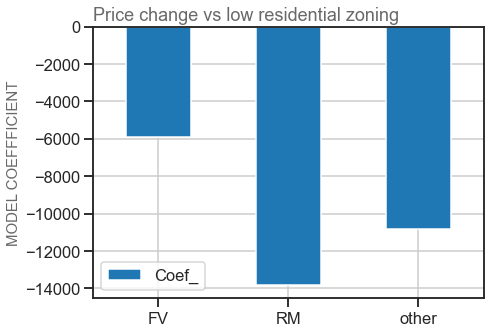

In [22]:
# coefs.loc['MS Zoning_FV':'MS Zoning_other'].plot(kind = 'bar')
coef_bar('MS Zoning_FV', 'MS Zoning_other', order = ['RM', 'FV', 'other'])
plt.xticks(rotation = 0)
plt.title('Price change vs low residential zoning', loc = 'left')
plt.show()

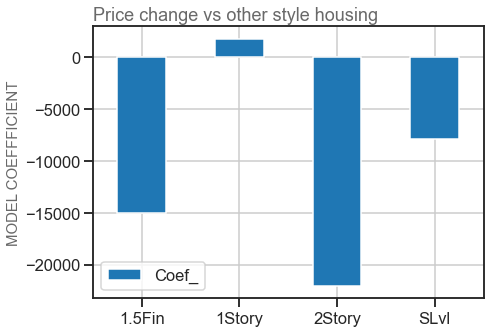

In [23]:
coef_bar('House Style_1.5Fin', 'House Style_SLvl',
    order = ['1Story', '2Story', '1.5Fin', 'SLvl'])
plt.title('Price change vs other style housing', loc = 'left')
plt.xticks(rotation = 0)
plt.show()

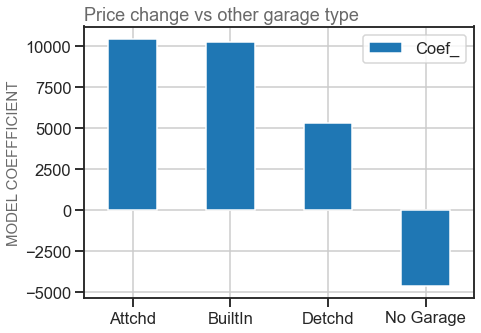

In [24]:
coef_bar('Garage Type_Attchd', 'Garage Type_No Garage',
    order = ['Attchd', 'Detchd', 'Builtin', 'No Garage'])
plt.title('Price change vs other garage type', loc = 'left')
plt.xticks(rotation = 0)
plt.show()

Text(0.5, 1.0, '')

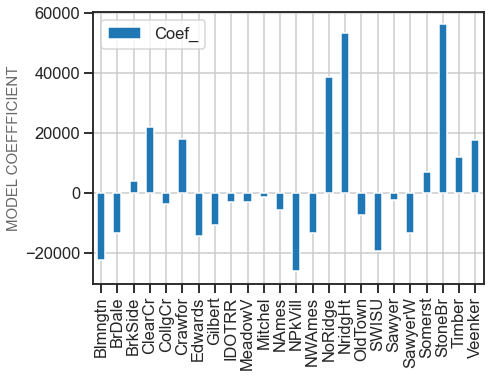

In [25]:
coef_bar('Neighborhood_Blmngtn', 'Neighborhood_Veenker')
plt.title('')

#### Statsmodels

In [26]:
X_full['int'] = np.ones_like(y)

In [27]:
import statsmodels.api as sm

In [28]:
model = sm.OLS(y, X_full).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     226.4
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:38:38   Log-Likelihood:                -24297.
No. Observations:                2051   AIC:                         4.868e+04
Df Residuals:                    2010   BIC:                         4.891e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MS Zoning_FV          -5895.4611   7347.681     -0.802      0.422   -2.03e+04    8514.407
MS Zoning_RM          -1.384e+04   3857.300     -3.588      0.000   -2.14e+04   -6275.877
MS Zoning_other       -1.085e+04   6787.875     -1.599      0.110   -2.42e+04    2461.571
Neighborhood_Blmngtn  -2.222e+04   1.27e+04     -1.746      0.081   -4.72e+04    2730.764
Neighborhood_BrDale   -1.334e+04   1.29e+04     -1.036      0.300   -3.86e+04    1.19e+04
Neighborhood_BrkSide   4082.4908   1.11e+04      0.368      0.713   -1.77e+04    2.58e+04
Neighborhood_ClearCr   2.189e+04   1.23e+04      1.783      0.075   -2184.716     4.6e+04
Neighborhood_CollgCr  -3825.5728   1.07e+04     -0.359      0.720   -2.47e+04    1.71e+04
Neighborhood_Crawfor   1.783e+04   1.11e+04      1.609      0.108   -3897.546    3.96e+04
Neighborhood_Edwards  -1.427e+04   1.07e+04     -1.327      0.185   -3.54e+04    6812.727
Neighborhood_Gilbert  -1.075e+04   1.09e+04     -0.984      0.325   -3.22e+04    1.07e+04
Neighborhood_IDOTRR   -2970.8949   1.13e+04     -0.264      0.792    -2.5e+04    1.91e+04
Neighborhood_MeadowV  -2967.1313   1.25e+04     -0.238      0.812   -2.74e+04    2.15e+04
Neighborhood_Mitchel  -1332.4853   1.09e+04     -0.122      0.903   -2.28e+04    2.01e+04
Neighborhood_NAmes    -5760.9641   1.05e+04     -0.546      0.585   -2.64e+04    1.49e+04
Neighborhood_NPkVill  -2.617e+04   1.32e+04     -1.989      0.047    -5.2e+04    -368.554
Neighborhood_NWAmes   -1.327e+04    1.1e+04     -1.209      0.227   -3.48e+04    8253.776
Neighborhood_NoRidge   3.873e+04   1.16e+04      3.332      0.001    1.59e+04    6.15e+04
Neighborhood_NridgHt   5.338e+04    1.1e+04      4.863      0.000    3.19e+04    7.49e+04
Neighborhood_OldTown  -7199.0673   1.07e+04     -0.674      0.500   -2.81e+04    1.37e+04
Neighborhood_SWISU     -1.95e+04   1.21e+04     -1.613      0.107   -4.32e+04    4204.418
Neighborhood_Sawyer   -2301.9112   1.09e+04     -0.212      0.832   -2.36e+04     1.9e+04
Neighborhood_SawyerW  -1.337e+04    1.1e+04     -1.217      0.224   -3.49e+04    8177.943
Neighborhood_Somerst   7100.1564   1.23e+04      0.578      0.563    -1.7e+04    3.12e+04
Neighborhood_StoneBr    5.62e+04   1.19e+04      4.740      0.000     3.3e+04    7.95e+04
Neighborhood_Timber     1.21e+04   1.15e+04      1.052      0.293   -1.04e+04    3.46e+04
Neighborhood_Veenker   1.781e+04   1.32e+04      1.345      0.179   -8168.373    4.38e+04
House Style_1.5Fin    -1.502e+04   4637.547     -3.238      0.001   -2.41e+04   -5922.544
House Style_1Story     1787.5328   4113.401      0.435      0.664   -6279.442    9854.507
House Style_2Story    -2.205e+04   4318.581     -5.106      0.000   -3.05e+04   -1.36e+04
House Style_SLvl      -7881.6443   5325.026     -1.480      0.139   -1.83e+04    2561.503
Garage Type_Attchd     

Ranking by t-values the most important features in this model are:
* Above ground living area (28.336)
* Overall Qual (19.141)
* Decade (5.942)
* House style_2 Story (-5.106)
* Cond Pos / nearby park (4.977)
* Northridge Heights (4.863) and Stone Brook (4.740) neighborhoods

For the categorical variables used, on the 0.05 level the following coefficients are significant:
* Mid-density rediential zoning
* 1.5 and 2 story styles 
* Garage style attached
* Cond Pos
* 4 out of the 24 neighborhoods

### Test predictions on unseen data

In [29]:
X_test = pd.read_csv('datasets/test_cleaned.csv', index_col = 'Id', na_filter=False)

In [30]:
X_test['Year Built Clipped'] = X_test['Year Built'].clip(lower = 1950, upper = 2009)
X_test['Decade'] = X_test['Year Built Clipped']//10*10

In [31]:
X_test['Garage Type'] = X_test['Garage Type'].replace({'NA': 'No Garage', 'Basment': 'Other', '2Types': 'Other', 'CarPort': 'Other'})
X_test['House Style'] = X_test['House Style'].replace( 
    {'SFoyer': 'Other', '2.5Unf': 'Other', '1.5Unf': 'Other', '2.5Fin': 'Other'})

In [32]:
X_test_num = X_test[num_cols]
X_test_cat_ohe = ohe.transform(X_test[cat_cols])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, 
    columns = ohe.get_feature_names_out(),
    index = X_test.index)

In [33]:
X_test_full = pd.merge(left = X_test_cat_ohe, right = X_test_num, left_index= True, right_index=True)

In [34]:
X_test_full

,MS Zoning_FV,MS Zoning_RM,MS Zoning_other,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,House Style_SLvl,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_Detchd,Garage Type_No Garage,Overall Qual,Decade,Cond RR,Cond Pos,Gr Liv Area
Id,,,,,,,,,,,,,,,,,,,,,
2658,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,6,1950,0,0,1928
2718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,5,1970,0,0,1967
2414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,7,2000,0,0,1496
1989,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,5,1950,0,0,968
625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6,1960,0,0,1394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6,1970,0,1,1877
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6,1960,0,0,1988
1373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,5,1960,0,0,1211


In [35]:
preds = lr.predict(X_test_full)

In [36]:
preds.shape

(878,)

In [37]:
pd.Series(preds, index = X_test.index, name = 'SalePrice').to_csv('submission/pres_model.csv', index=True)

Kaggle score: RMSE of $31,500.